In [15]:
%pylab inline
%load_ext autoreload
%autoreload 2
# import numpy as np
# import random

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual Regret Minimization

### Description
The idea is to use the concept of "regret" in a game-theoretic world to learn the the best possible strategy to play given an opponents strategy.

This algorithm will coverge to MSNE (Nash Equilibrium).

[See article](http://modelai.gettysburg.edu/2013/cfr/cfr.pdf)

In [73]:
# Define constants
ROCK, PAPER, SCISSORS = 0, 1, 2
NUM_ACTIONS = 3

# np arrays for the two strageties
# start your own strategy as all 0s
strategy = np.zeros(NUM_ACTIONS, dtype=float)
oppStrategy = np.array([0.4, 0.3, 0.3])

# sums for averaging later on
regretSum = np.zeros(NUM_ACTIONS, dtype=float)
strategySum = np.zeros(NUM_ACTIONS, dtype=float)

In [74]:
# returns the value for player 1 given
# action choices of player one and player two
def value(p1, p2):
    if (p1 == ROCK and p2 == SCISSORS):
        return 1
    if (p1 == PAPER and p2 == ROCK):
        return 1
    if (p1 == SCISSORS and p2 == PAPER):
        return 1
    elif (p1 == p2):
        return 0
    else:
        return -1
    
def getStrategy():
    normalizingSum = 0
    for a in range(0, NUM_ACTIONS):
        strategy[a] = regretSum[a] if regretSum[a] > 0 else 0
        normalizingSum += strategy[a]
    for a in range(0, NUM_ACTIONS):
        if (normalizingSum > 0):
            strategy[a] = strategy[a] / normalizingSum
        else:
            strategy[a] = 1.0 / NUM_ACTIONS
    strategySum[a] += strategy[a]
    return strategy

def getAction(strategy):
    r = np.random.random()
    a = 0
    cumProbability = 0
    while (a < NUM_ACTIONS - 1):
        cumProbability += strategy[a]
        if (r < cumProbability):
            break
        a = a + 1
    return a

In [75]:
def train(iterations):
    actionUtility = np.zeros(NUM_ACTIONS)
    for i in range(0, iterations):
        strategy = getStrategy()
        myAction = getAction(strategy)
        oppAction = getAction(oppStrategy)
        actionUtility[oppAction] = 0
        actionUtility[0 if oppAction == NUM_ACTIONS - 1 else oppAction + 1] = 1
        actionUtility[NUM_ACTIONS - 1 if oppAction == 0 else oppAction - 1] = -1
        for x in range(0, NUM_ACTIONS):
            regretSum[x] += actionUtility[x] - actionUtility[myAction]
            
def getAverageStrategy():
    avgStrategy = np.zeros(NUM_ACTIONS, dtype=float)
    normalizingSum = 0
    for a in range(0, NUM_ACTIONS):
        normalizingSum += strategySum[a]
        
    for a in range(0, NUM_ACTIONS):
        if (normalizingSum > 0):
            avgStrategy[a] = strategySum[a] / normalizingSum
        else:
            avgStrategy[a] = 1 / NUM_ACTIONS
    return avgStrategy

([<matplotlib.lines.Line2D at 0x110ac6f60>], -8.995, array([0., 0., 1.]))

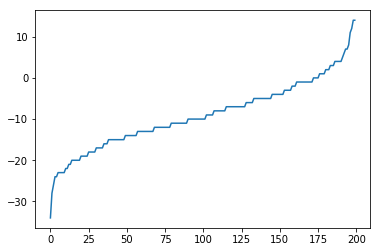

In [82]:
train(1000)

bestStrat = getAverageStrategy()
vvv = []
for r in range(0, 200):
    vv = 0
    for i in range(0, 100):
        strat = getStrategy()
        strat = bestStrat
        action = getAction(strat)
        otherAction = getAction(oppStrategy)
        vv += value(action, otherAction)
    vvv.append(vv)
plot(sorted(vvv)), np.mean(vvv), bestStrat

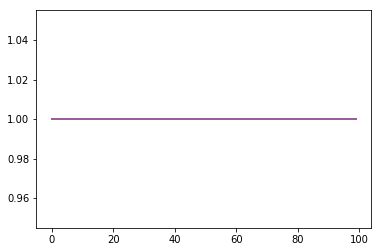

In [83]:
strategies = []
for x in range(0, 5):
    strategies = [getAction(getStrategy()) for i in range(0, 100)]
    plot(sorted(strategies))